In [1]:
# importing the libraries
import numpy as np
import pandas as pd



In [2]:
# opening the data
#everything is ASCII except for that single 0x92 byte
# decode that  in a encoding='cp1252'

df=pd.read_csv('GSAF5.csv', encoding='cp1252')
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [3]:
### General insights
df.shape

# check the shape of our dataframe - 5992 rows by 24 columns

(5992, 24)

In [194]:
df.dtypes

# check the columns

Case_Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal_(Y/N)               object
Time                      object
Species                   object
Investigator_or_Source    object
pdf                       object
href_formula              object
href                      object
Case_Number.1             object
Case_Number.2             object
original_order             int64
Unnamed:_22               object
Unnamed:_23               object
dtype: object

In [170]:
#check the on many unique values per column
# original order as the most unique values could be used as and index or pivot column

unique_list=[(i, df[i].nunique()) for i in df.columns]
unique_list

[('Case_Number', 5976),
 ('Date', 5128),
 ('Year', 232),
 ('Type', 6),
 ('Country', 203),
 ('Area', 785),
 ('Location', 3929),
 ('Activity', 1492),
 ('Name', 5009),
 ('Sex', 6),
 ('Age', 151),
 ('Injury', 3595),
 ('Fatal_(Y/N)', 8),
 ('Time', 357),
 ('Species', 1538),
 ('Investigator_or_Source', 4752),
 ('pdf', 5981),
 ('href_formula', 5980),
 ('href', 5972),
 ('Case_Number.1', 5975),
 ('Case_Number.2', 5976),
 ('original_order', 5988),
 ('Unnamed:_22', 1),
 ('Unnamed:_23', 2)]

In [54]:
# for general overview of the data a retrieve some random samples

df.sample(10)

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,Unnamed:_22,Unnamed:_23
935,2009.02.08,08-Feb-09,2009,Sea Disaster,USA,Puerto Rico,Quebradillas,Air Disaster,occupant of a Cessna 206,M,...,NaN,"C. Ekstander, GSAF",2009.02.08-PuertoRicoAirCrash.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.02.08,2009.02.08,5058,NaN,NaN
3432,1964.10.31,31-Oct-64,1964,Provoked,SOUTH AFRICA,KwaZulu-Natal,Umkomaas,Surf fishing,Robin Clausen,M,...,NaN,"M. Levine, GSAF",1964.10.31-Clausen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1964.10.31,1964.10.31,2561,NaN,NaN
3637,1961.12.28.b,28-Dec-61,1961,Unprovoked,AUSTRALIA,Queensland,"Lambert’s Beach, Mackay",Standing,Martyn Steffens,M,...,3 m [10'] shark,"V.M. Coppleson (1962), p.246; A. MacCormick, p...",1961.12.28.b-Steffens.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.12.28.b,1961.12.28.b,2356,NaN,NaN
5500,1887.02.08,08-Feb-1887,1887,Provoked,SOUTH AFRICA,Western Cape Province,Blaauwberg,NaN,boat,NaN,...,4.7 m [15.5'] shark,GSAF,1887.02.08-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1887.02.08,1887.02.08,493,NaN,NaN
1649,2002.03.25.b,25-Mar-02,2002,Unprovoked,USA,Hawaii,"Brenecke Beach, Po'ipu, Kaua'i",Body-boarding,Hoku Aki,M,...,Tiger shark,"G. Kubota, Honolulu Star Bulletin",2002.03.25.b-HokuAki.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2002.03.25.b,2002.03.25.b,4344,NaN,NaN
523,2012.09.02.b,02-Sep-12,2012,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Boogie boarding,female,F,...,3.5' to 4' shark,"WYTV, 9/3/2012",2012.09.02.b-NSB-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.09.02.b,2012.09.02.b,5470,NaN,NaN
5601,1877.12.12,12-Dec-1877,1877,Unprovoked,AUSTRALIA,New South Wales,Near Sydney,Washed overboard from the barque Mary Eady,2 males,M,...,NaN,"Brisbane Courier, 12/15/1877",1877.12.12-MaryEady.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1877.12.12,1877.12.12,392,NaN,NaN
538,2012.07.24,24-Jul-12,2012,Invalid,USA,North Carolina,"Ocean Isle, Brunswick County",NaN,male,M,...,Shark involvement not confirmed,"C. Creswell, GSAF",2012.07.24-OceanIsle.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.07.24,2012.07.24,5455,NaN,NaN
4423,1944.03.26.b,26-Mar-44,1944,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Country Club Beach, Durban",Treading water,Gabriel Botha,M,...,NaN,"G. Botha, M. Levine, GSAF",1944.03.26.b-Botha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1944.03.26.b,1944.03.26.b,1570,NaN,NaN
3964,1957.10.23,23-Oct-57,1957,Unprovoked,SOLOMON ISLANDS,Honiara,Honiara,NaN,Melanesian woman,F,...,NaN,"V.M. Coppleson (1962), p.248",1957.10.23-Melanesian-woman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1957.10.23,1957.10.23,2029,NaN,NaN


In [7]:
df['Sex '].value_counts()


M      4835
F       585
M         2
lli       1
.         1
N         1
Name: Sex , dtype: int64

In [8]:
#the column names also need cleaning
#treating the columns index for more readable and manipulating
df.columns=[x.strip().replace(' ','_') for x in df.columns]
x=[print(i) for i in df.columns]

Case_Number
Date
Year
Type
Country
Area
Location
Activity
Name
Sex
Age
Injury
Fatal_(Y/N)
Time
Species
Investigator_or_Source
pdf
href_formula
href
Case_Number.1
Case_Number.2
original_order
Unnamed:_22
Unnamed:_23


In [9]:
#Checking 

In [10]:
df.isna().sum()
# check for num value

Case_Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal_(Y/N)                 19
Time                      3213
Species                   2934
Investigator_or_Source      15
pdf                          0
href_formula                 1
href                         3
Case_Number.1                0
Case_Number.2                0
original_order               0
Unnamed:_22               5991
Unnamed:_23               5990
dtype: int64

In [11]:
df.isna().sum()/len(df)
#percentage of non values

Case_Number               0.000000
Date                      0.000000
Year                      0.000000
Type                      0.000000
Country                   0.007176
Area                      0.067089
Location                  0.082777
Activity                  0.087951
Name                      0.033378
Sex                       0.094626
Age                       0.447430
Injury                    0.004506
Fatal_(Y/N)               0.003171
Time                      0.536215
Species                   0.489653
Investigator_or_Source    0.002503
pdf                       0.000000
href_formula              0.000167
href                      0.000501
Case_Number.1             0.000000
Case_Number.2             0.000000
original_order            0.000000
Unnamed:_22               0.999833
Unnamed:_23               0.999666
dtype: float64

In [197]:
(df['Unnamed:_22'].value_counts() ,
  df['Unnamed:_23'].value_counts())
# this columns have more than 90% non value , they dont matter

(stopped here    1
 Name: Unnamed:_22, dtype: int64,
 change filename    1
 Teramo             1
 Name: Unnamed:_23, dtype: int64)

In [13]:
#find the not non value rows in 'Unnamed:_22' and 'Unnamed:_23'
# simple concant to see everything

pd.concat([
           df.loc[pd.notnull(df["Unnamed:_22"])] ,
            df.loc[pd.notnull(df["Unnamed:_23"])] 
                ])

# it seems it is some comments of records change
# irrelevant for our 

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,Unnamed:_22,Unnamed:_23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,...,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,"Gerald Howard, on board sportsfishing boat Ter...",M,...,NaN,"L.A. Times, 7/14/1952",1952.07.13-Howard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.07.13,1952.07.13,1811,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,Cabin boy of the Bonnie Dundee,M,...,NaN,"Star, 3/22/1879",1879.03.10-Bonnie-Dundee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1879.03.10,1879.03.10,408,NaN,change filename


In [14]:
#removing the two last columns
df_copy=df.drop(columns=['Unnamed:_23','Unnamed:_22']).copy()

In [15]:
# select a random of rows to see the types of values and how to aproach the cleaning

df_copy.sample(n=10)

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order
4599,1938.00.00.d,1938,1938,Unprovoked,TRINIDAD & TOBAGO,Trinidad,"Manzanilla Bay, St. Andrew County",Body surfing,Donald Fraser Huggins,M,...,N,NaN,"""grey-colored shark""","E. Pace, FSAF",1938.00.00.d-Huggins.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1938.00.00.d,1938.00.00.d,1394
1854,2000.00.00,2000,2000,Boat,USA,Florida,"Boca Grande, Lee County",Fishing for tarpon,"boat: occupant, Terry Winters",M,...,N,NaN,Hammerhead shark,"B. Stout, News-Press, 7/2/2005",2000.00.00-BocaGrandeBoat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.00.00,2000.00.00,4139
4540,1940.03.20,20-Mar-40,1940,Unprovoked,AUSTRALIA,New South Wales,Gerringong,Free diving for lobster,Smiles Walker,M,...,N,NaN,Wobbegong shark,"Sydney Morning Herald, 3/21/1940; V.M. Copples...",1940.03.20-Walker.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.03.20,1940.03.20,1453
3825,1959.11.01,01-Nov-59,1959,Provoked,PAPUA NEW GUINEA,New Britain,"Rapindik Beach, Rabaul",Fishing,male,M,...,N,NaN,NaN,"A. M. Rapson, p.147",1959.11.01-Rabaul.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1959.11.01,1959.11.01,2168
203,2015.05.15,15-May-15,2015,Unprovoked,USA,South Carolina,Sullivan's Island,NaN,male,M,...,N,14h15,6' shark,"News 2, 5/15/2015",2015.05.15-Sullivans.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.05.15,2015.05.15,5789
3616,1962.01.21,21-Jan-62,1962,Provoked,AUSTRALIA,New South Wales,Cronulla,Spearfishing,Robert Smith,M,...,N,NaN,"Bronze whaler shark, 3m [10']","Daily Mirror (Sydney) & Sydney Morning Herald,...",1962.01.21-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.01.21,1962.01.21,2377
5849,1733.00.00,1733,1733,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,NaN,NaN,...,NaN,NaN,NaN,E. Olafsen,1733.00.00-Iceland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1733.00.00,1733.00.00,144
3005,1975.04.18,18-Apr-75,1975,Invalid,SOUTH AFRICA,KwaZulu-Natal,Durban,NaN,Indian male,M,...,Y,NaN,NaN,"B. Davis, NSB",1975.04.18-IndianMale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1975.04.18,1975.04.18,2988
5363,1897.12.04.R,Reported 04-Dec-1897,1897,Provoked,USA,East coast,NaN,Angling,a sailor,M,...,N,NaN,NaN,"Trenton Evening Times, 12/4/1897",1897.12.04.R-Sailor.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1897.12.04.R,1897.12.04.R,630
568,2012.05.29,29-May-12,2012,Unprovoked,MEXICO,Guerrero,"Boca de la Leña, La Unión",Free diving / spearfishing,Benigno Medina Navarrete,M,...,N,09h00,"Bull shark, 3m","El Sol ee Morelia, 5/30/2012",2012.05.29-Navarrette.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.05.29,2012.05.29,5425


In [16]:
#checking for differente values from 3 collums

pd.Series((df_copy['Case_Number.1']==df_copy['Case_Number.2'])
          & (df_copy['Case_Number.2']==df_copy['Case_Number'])).value_counts()

True     5979
False      13
dtype: int64

In [17]:
df_copy[(pd.Series((df_copy['Case_Number.1']==df_copy['Case_Number.2'])
          & (df_copy['Case_Number.2']==df_copy['Case_Number'])) )== False]

# with this function i could see all of the rows where the 3 differente case numbers are diferent
# OUTPUT of a total 13 rows!

#all of the other rows are equal and the different are just minor diferences
# i also notice that i could extract a more "clean date from the records"

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989
33,2016.07.14.4,Reported 14-Jul-2016,2016,Unprovoked,BAHAMAS,NaN,Tiger Beach,Scuba Diving,Michael Dornellas,M,...,N,NaN,"Lemon shark, 9'","GrindTV, 7/14/2016",2016.07.14.R-TigerBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.14.R,2016.07.14.4,5960
97,2016.01.24.b,24-Jan-16,2016,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,...,N,09h30 / 10h00,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5896
116,2015.12.23,07-Nov-15,2015,Invalid,USA,Florida,"Paradise Beach, Melbourne, Brevard County",Surfing,Ryla Underwood,F,...,N,11h00,Shark involvement not confirmed,"Fox25Orlando, 11/7/2015",2015.11.07-Underwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.11.07,2015.12.23,5876
121,2015.10.28.a,28-Oct-15,2015,Unprovoked,USA,Hawaii,"Malaka, Oahu",Body boarding,Raymond Senensi,M,...,N,14h50,NaN,"Star Advertiser, 10/28/2015",2015.10.28-Senensi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.28,2015.10.28.a,5871
169,2015.07-10,10-Jul-15,2015,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,...,N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5823
3296,1967.07.05,05-Jul-67,1967,Unprovoked,TURKEY,Mugla Province,Kucukada Island,Spearfishing,Gungor Guven,M,...,Y,13h40,NaN,"C. Moore, GSAF",1967.07.05-Guven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967/07.05,1967.07.05,2697
3569,"1962,08.30.b",30-Aug-62,1962,Boat,TURKEY,Antalya Province,Ucagiz,NaN,Occupant: Hasan Olta,M,...,N,NaN,NaN,"C.Moore, GSAF",1962.08.30.b-pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.08.30.b,"1962,08.30.b",2424
3654,1961.09.02.R,Reported 06-Sep-1961,1961,Provoked,ITALY,Venice Province,Chioggia,Fishing,Pollione Perrini & Fioravante Perini,M,...,N,NaN,1 m shark,"C. Moore, GSAF",1961.09.06.R-Chioggia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"1961.09,06.R",1961.09.02.R,2339
4177,1952.08.05,05-Aug-52,1952,Provoked,ITALY,Teramo,Giulianova,Fishing,Vittorio Speca,NaN,...,Y,02h00,2m shark,"C. Moore, GSAF",1952.08.05-Speca.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.08.04,1952.08.05,1816


In [18]:
# I will group for year and count the number of shark attacks for our first question


records_year=df.groupby(by="Year").size().copy()


5.87 µs ± 637 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


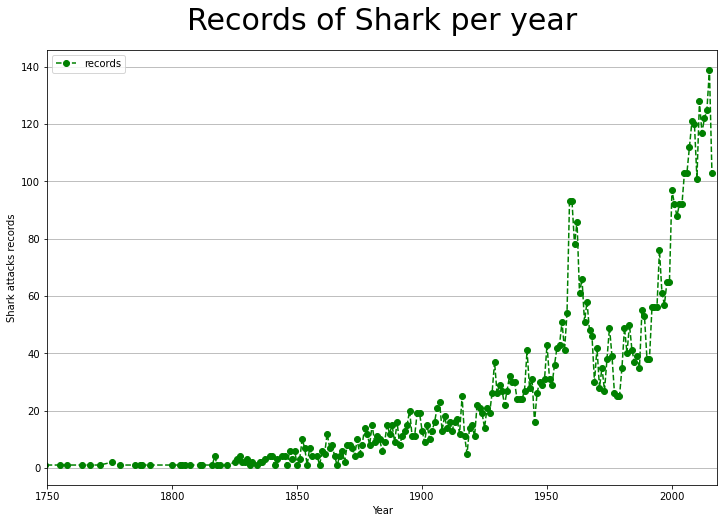

In [19]:
# for plotting
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%timeit [x**2 for x in range(10)]
%magic

# How to initialize the two essential objects for plotting:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(records_year,
       color='green',
       marker='o',
       linestyle='dashed',
       label='records',
       )
ax.set_xlim([1800,2018])
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Shark attacks records', fontsize=10);
ax.set_title('Records of Shark per year', fontsize=30, pad=20);
ax.grid(axis='y')
ax.legend()



In [20]:
##  FALSE insights
# this doenst show us the increase of shark attacks but the number of records are
# you can relate this to the covid infections statisctis because there is more cases doenst mean that the cases are rising but could also mean there are more testing


In [21]:
# extract the date from column 1
# assing a new columm with date from case number
# clean value with regex
# data type 1111011011

df_copy=df_copy.assign(date_cn=df_copy['Case_Number'].astype(str).str[0:10]) # extracts the first 10 char

# with this function a manage reduce NAN from 862 to 525 non values
#good enough to check records per month
df_copy['date_cn']=df_copy['date_cn'].replace({'00$': '01'}, regex=True) 



# convert the data type to a datetime 
df_copy['date_cn']=pd.to_datetime(df_copy['date_cn'],format='%Y.%m.%d',errors='coerce')



df_copy



,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,date_cn
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,2016-09-18
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,2016-09-18
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,2016-09-18
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,2016-09-17
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,2016-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaT
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaT
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaT
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaT


In [22]:
df_copy.isna().sum()
#df_copy.dtypes


Case_Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal_(Y/N)                 19
Time                      3213
Species                   2934
Investigator_or_Source      15
pdf                          0
href_formula                 1
href                         3
Case_Number.1                0
Case_Number.2                0
original_order               0
date_cn                    525
dtype: int64

In [228]:
# records_year2=df_copy.groupby(pd.Grouper(key="date_cn", freq="Y")).size().copy()

In [229]:
# records_year2

date_cn
1703-12-31      1
1704-12-31      0
1705-12-31      0
1706-12-31      0
1707-12-31      0
             ... 
2012-12-31    117
2013-12-31    122
2014-12-31    124
2015-12-31    138
2016-12-31    103
Length: 314, dtype: int64

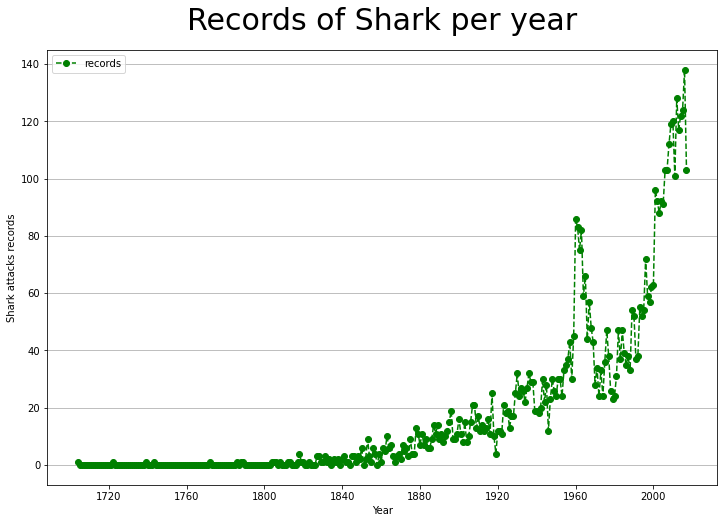

In [230]:
# How to initialize the two essential objects for plotting:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(records_year2,
       color='green',
       marker='o',
       linestyle='dashed',
       label='records',
       )
#ax.set_xlim([1800,2018])
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Shark attacks records', fontsize=10);
ax.set_title('Records of Shark per year', fontsize=30, pad=20);
ax.grid(axis='y')
ax.legend()

In [98]:
df_copy.sample(10)

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,date_cn
2383,1991.01.19,19-Jan-91,1991,Unprovoked,AUSTRALIA,Queensland,Mermaid Waters,Swimming,Michael Sproule,M,...,08h10,NaN,"Sunday Mail, 1/20/1991, p.1",1991.01.19-Sproule.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.01.19,1991.01.19,3611,1991-01-19
70,2016.04.18,18-Apr-16,2016,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Teva Tokoragi,M,...,NaN,"Grey reef shark, 2 m","Tahiti Infos, 4/19/2016",2016.04.18-Tokoragi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18,2016.04.18,5923,2016-04-18
5843,1758.00.00,1758,1758,Unprovoked,MEDITERRANEAN SEA,NaN,NaN,Fell overboard from a frigate & was swallowed ...,sailor,M,...,NaN,"""The fish was harpooned, dried, and presented ...",A.M. Hodgkin,1758.00.00-Mediterranean.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1758.00.00,1758.00.00,150,NaT
690,2011.06.06.R,Reported 06-Jun-2011,2011,Unprovoked,COLUMBIA,San Andrés archipelago,Albuquerque Cay,Spearfishing,Jhon Jairo James,M,...,NaN,NaN,"Il Isleno.com, 6/6/2011",2011.06.06.R-James.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.06.06.R,2011.06.06.R,5303,2011-06-06
3360,1966.02.27,27-Feb-66,1966,Unprovoked,AUSTRALIA,New South Wales,Coledale Beach,Treading water,Raymond Short,M,...,14h00,"White shark, 2.5 m [8.25'], an immature female...","T. B. Gorman & D.J. Dunatan, NSW State Fisheri...",1966.02.27-Short.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1966.02.27,1966.02.27,2633,1966-02-27
4434,1944.00.00.a,1944,1944,Unprovoked,NEW GUINEA,Pacific Ocean,NaN,Fell overboard from USS Ward,sailor,M,...,NaN,NaN,GSAF,1944.00.00.a-Ward crew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1944.00.00.a,1944.00.00.a,1559,NaT
5296,1902.06.02,02-Jun-02,1902,Unprovoked,PHILIPPINES,Zamboanga del Sur Province,"Near mouth of River Cumalarang, 5 miles from P...",NaN,Apy,M,...,NaN,NaN,"V.M. Coppleson, p.264",1902.06.08-Apy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1902.06.02,1902.06.02,697,1902-06-02
869,2009.09.07,07-Sep-09,2009,Unprovoked,BRAZIL,Pernambuco,"Piedade, Recife","Swimming, attempting to rescue a girl believe...",Geovanni Tiago Barbosa,M,...,Afternoon,NaN,"C. Eksander, GSAF",2009.09.07-Barbosa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.09.07,2009.09.07,5124,2009-09-07
407,2013.09.01.a,01-Sep-2013,2013,Unprovoked,USA,Florida,"St Augustine Beach, St Johns County",Casting a net,Connor Baker,M,...,12h00,4' shark,"WTEV 47, 9/1/2013",2013.09.01.a-Baker.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.09.01.a,2013.09.01.a,5586,2013-09-01
5927,ND.0073,"No date, Before 1963",0,Unprovoked,SINGAPORE,NaN,"Keppel Harbor, 2 miles from Singapore city ce...",Swimming,NaN,NaN,...,NaN,NaN,"V.M. Coppleson (1958), p.266",ND-0073-KeppelHarbourSingapore.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0073,ND.0073,66,NaT


In [99]:
#checking for differente values from href_formula and href

pd.Series((df_copy['href_formula']==df_copy['href'])).value_counts()

# checking the different values between those two columns
#  df_copy[(pd.Series((df_copy['href_formula']==df_copy['href']))) == False][['href_formula', 'href']] 


True     5938
False      54
dtype: int64

In [100]:
df_copy["Country"].value_counts()

USA                 2116
AUSTRALIA           1279
SOUTH AFRICA         565
PAPUA NEW GUINEA     133
NEW ZEALAND          125
                    ... 
DJIBOUTI               1
IRELAND                1
MALDIVE ISLANDS        1
BAY OF BENGAL          1
ASIA?                  1
Name: Country, Length: 203, dtype: int64

In [178]:
# for a better view of the data I remove the columns that had text , repetitive information, colum with names.
# basicaly i made a new list with information i can gather into groups and left two columns with unique  values
# (case_number and original_order) in case i need to merge with some aditional data

df_essencial=df_copy[['Case_Number', 'date_cn', 'Type','Activity', 'Country', 'Area','Location',
                     'Sex', 'Age', 'Injury', 'Fatal_(Y/N)', 'Time','Species', 'original_order']].copy()

In [179]:
df_essencial

,Case_Number,date_cn,Type,Activity,Country,Area,Location,Sex,Age,Injury,Fatal_(Y/N),Time,Species,original_order
0,2016.09.18.c,2016-09-18,Unprovoked,Surfing,USA,Florida,"New Smyrna Beach, Volusia County",M,16,Minor injury to thigh,N,13h00,NaN,5993
1,2016.09.18.b,2016-09-18,Unprovoked,Surfing,USA,Florida,"New Smyrna Beach, Volusia County",M,36,Lacerations to hands,N,11h00,NaN,5992
2,2016.09.18.a,2016-09-18,Unprovoked,Surfing,USA,Florida,"New Smyrna Beach, Volusia County",M,43,Lacerations to lower leg,N,10h43,NaN,5991
3,2016.09.17,2016-09-17,Unprovoked,Surfing,AUSTRALIA,Victoria,Thirteenth Beach,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,5990
4,2016.09.15,2016-09-15,Unprovoked,Surfing,AUSTRALIA,Victoria,Bells Beach,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,NaT,Unprovoked,Diving,AUSTRALIA,Western Australia,Roebuck Bay,M,NaN,FATAL,Y,NaN,NaN,6
5988,ND.0004,NaT,Unprovoked,Pearl diving,AUSTRALIA,Western Australia,NaN,M,NaN,FATAL,Y,NaN,NaN,5
5989,ND.0003,NaT,Unprovoked,Swimming,USA,North Carolina,Ocracoke Inlet,M,NaN,FATAL,Y,NaN,NaN,4
5990,ND.0002,NaT,Unprovoked,NaN,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",M,NaN,FATAL,Y,NaN,NaN,3


In [180]:
# the next data cleaning ill do is
# capitalize and strip all strings from relanvant columns so there ll be less types of entries on the following collumns:
# type , country,Sex, Fatal_(Y/N), species

#df_essencial[['Type' , 'Country','Sex', 'Fatal_(Y/N)', 'Species']]= 

clist=['Type' ,'Activity', 'Country','Sex', 'Fatal_(Y/N)', 'Species']

for i in clist:
    df_essencial[i]=df_essencial[i].str.upper().str.strip()
    
df_essencial

,Case_Number,date_cn,Type,Activity,Country,Area,Location,Sex,Age,Injury,Fatal_(Y/N),Time,Species,original_order
0,2016.09.18.c,2016-09-18,UNPROVOKED,SURFING,USA,Florida,"New Smyrna Beach, Volusia County",M,16,Minor injury to thigh,N,13h00,NaN,5993
1,2016.09.18.b,2016-09-18,UNPROVOKED,SURFING,USA,Florida,"New Smyrna Beach, Volusia County",M,36,Lacerations to hands,N,11h00,NaN,5992
2,2016.09.18.a,2016-09-18,UNPROVOKED,SURFING,USA,Florida,"New Smyrna Beach, Volusia County",M,43,Lacerations to lower leg,N,10h43,NaN,5991
3,2016.09.17,2016-09-17,UNPROVOKED,SURFING,AUSTRALIA,Victoria,Thirteenth Beach,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,5990
4,2016.09.15,2016-09-15,UNPROVOKED,SURFING,AUSTRALIA,Victoria,Bells Beach,M,NaN,No injury: Knocked off board by shark,N,NaN,2 M SHARK,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,NaT,UNPROVOKED,DIVING,AUSTRALIA,Western Australia,Roebuck Bay,M,NaN,FATAL,Y,NaN,NaN,6
5988,ND.0004,NaT,UNPROVOKED,PEARL DIVING,AUSTRALIA,Western Australia,NaN,M,NaN,FATAL,Y,NaN,NaN,5
5989,ND.0003,NaT,UNPROVOKED,SWIMMING,USA,North Carolina,Ocracoke Inlet,M,NaN,FATAL,Y,NaN,NaN,4
5990,ND.0002,NaT,UNPROVOKED,NaN,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",M,NaN,FATAL,Y,NaN,NaN,3


In [215]:
# Boat and Boating is for me the same activity

df_essencial['Type'].replace("BOAT", "BOATING", inplace=True)
df_essencial['Type'].value_counts()

UNPROVOKED      4386
PROVOKED         557
INVALID          519
BOATING          310
SEA DISASTER     220
Name: Type, dtype: int64

In [182]:
# here we can see the ten top Countrys of records
(df_essencial["Country"].value_counts().iloc[0:10], 
 
print("the top 10 countries with the most shark attacks records represent", 
      round(df_essencial["Country"].value_counts().iloc[0:10].sum()/5992*100,2), "% of the raw data")
                                                                                                        )

the top 10 countries with the most shark attacks records represent 77.37 % of the raw data


(USA                 2116
 AUSTRALIA           1279
 SOUTH AFRICA         565
 PAPUA NEW GUINEA     133
 NEW ZEALAND          125
 BRAZIL               102
 BAHAMAS               98
 MEXICO                82
 ITALY                 71
 FIJI                  65
 Name: Country, dtype: int64,
 None)

In [183]:
#df_essencial["Age"].value_counts().tail(50)
df_essencial["Age"]=df_essencial["Age"].str.strip()
df_essencial["Age"]

0        16
1        36
2        43
3       NaN
4       NaN
       ... 
5987    NaN
5988    NaN
5989    NaN
5990    NaN
5991     15
Name: Age, Length: 5992, dtype: object

In [191]:
# comparing to my inicial Dataframe
unique_essencial=[(i, df_essencial[i].nunique()) for i in df_essencial.columns]
unique_essencial

[('Case_Number', 5976),
 ('date_cn', 4761),
 ('Type', 6),
 ('Activity', 1435),
 ('Country', 192),
 ('Area', 785),
 ('Location', 3929),
 ('Sex', 5),
 ('Age', 149),
 ('Injury', 3595),
 ('Fatal_(Y/N)', 5),
 ('Time', 357),
 ('Species', 1441),
 ('original_order', 5988)]

In [193]:
# write to a .csv file

df_essencial.to_csv('Mydatacleaning.csv')

#shape of the data
df_essencial.shape

(5992, 14)